# Introduction 


> Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

The learning output from this:
- What the word embedding approach for representing text is and how it differs from other feature extraction methods.
- That there are 3 main algorithms for learning a word embedding from text data.
- That you can either train a new embedding or use a pre-trained embedding on your natural language processing task.


**Concept:**
> Individual words are represented as real valued vectors in a predifined vector space (often tens or hudreds of dimensions). These vectors capture the semantic meaning of the words based on their usage in a language.


The capturing semantic works:
- The distributed representation is learned based on how words are used in context.
- Words that are used in similar context will have similar vector representations.
- This allows the embeddings to capture semantic relationships between words.

# Word Embedding Algorithms

## Embedding Layer

Overall process: Transform categorical data (words in this case) into dense real-valued vectors. Then the embedding layer is used on the front end of a neural network and is fit in a supervised way using the Backpropagation algorithm.

The algorithm:
1. Initialization
> Transforms categorical data (in this case words) into dense, real-valued vectors. Each value is initialized with random values or pre-trained word embedding (e.g Word2Vec, GloVe).

NOTE: 
- This matix called Embedding Matrix with dimension (vocabulary size, embedding dimension).
- To handle embedding lookup, each word in the vocabulary is mapped to a unique integer index. For example "cat" is mapped to the index "5".

2. Training a Neural Network
> When a neutral network is trained, the embedding vectors are updated through Back Propagation. This process adjusts the vector values to capture the semantic relationship between words based on the training data.



The output:

> The output of the embedding layer is a dense matrix where each row corresponds to the dense vector representation of a word from the input sequence.

If the input sequence has 'n' words and the embedding dimension is 'd', then the ourput will be a matrix of size (n, d)

## Word2Vec

> Word2Vec is a statistical method for efficiently learning a standalone word embedding from a text corpus.

NOTE: It was developed by Tomas Mikolov, et al at Google in 2013.

The two different learning model of how Word2Vec approach to learn the word embedding:

1. Continuous Bag-of-Words Model (CBOW Model) 

> Predicts the target word based on context words.

> Generally faster because it averages context word embeddings, leading to fewer updates per training instance.

2. Continuous Skip-Gram Model

> Predicts context words based on the target word.

> May take longer to train but often results in better quality embeddings, especially for infrequent words.

NOTE:
- Context words are the words surrounding the target word within a fixed window size.

- Window size is number of words before and after the target word that are included in the context word.

Example:
"The cat sat on the mat," If we consider "cat" as the target, then the context words could be ["The", "cat", "on", "the", "mat"]. 

If we set the window size is 2, then the context become ["The", "cat", "on", "the"] where ["The"] which is the two before "cat" word and ["on", "the"] is the two after "cat" word.

## The Global Vectors for Word Representation (GloVe)

Concept:

- GloVe begins by constructing a word co-occurrence matrix from the corpus.
- Each element in this matrix represents how often a word co-occurs with another word within a given context window.
- GloVe focuses on the ratios of co-occurrence probabilities rather than the raw counts
- GloVe uses a weighted least squares objective to find the embeddings that best represent the ratios of co-occurrence probabilities.


Algorithm:
1. Build the Co-occurrence Matrix

> The matrix (define it as X_ij) represents the number of times word j appears in the context of word i.

2. Calculate Co-occurence Probabilities

> For each word pair (i, j) calculate the probabilitiy of their co-occurence, P_ij = X_ij/X_i where X_i is the total number of times word i appears in the corpus.

3. Define the Objective Function

> The GloVe objective function aims to minimize the difference between the dot product of the word vectors and the logarithm of their co-occurrence probability.

> The weighting function is designed to balance the influence of different co-occurrence counts.



# Develop Word2Vec Embedding

Documentation word2vec gensim: https://radimrehurek.com/gensim/models/word2vec.html

Some common use parameters in word2vec model:

- size (default 100): The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- window (default 5): The maximum distance between a target word and words around the target word.
- min_count (default 5): The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- workers (default 3): The number of threads to use while training.
- sg (defaul 0 or CBOW): The training algorithm, either CBOW (0) or skip gram (1)

In [1]:
from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, min_count=1)

# Summarize the loaded model
print("The loaded model: ", model)

# Summarize vocabulary
words = list(model.wv.key_to_index)
print("Summarize vocabulary: ", words)
# Access vocabulary
# key_to_index = model.wv.key_to_index
# index_to_key = model.wv.index_to_key

# print("Key to index ", key_to_index)
# print("Index to key ", index_to_key)

# Access vector for one word
print(model.wv['sentence'])

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print("Loaded model: ", new_model)

The loaded model:  Word2Vec<vocab=14, vector_size=100, alpha=0.025>
Summarize vocabulary:  ['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981

**Visualize Word Embedding**

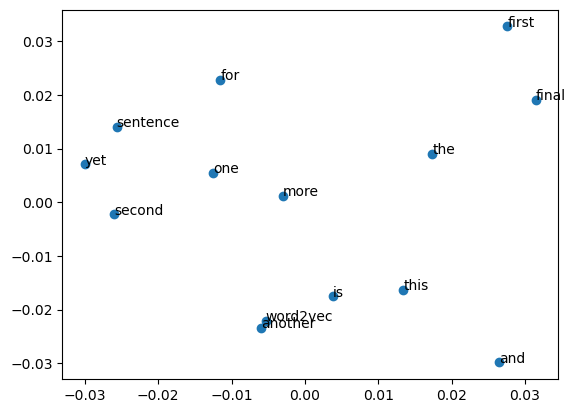

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get embedding matrix
X = model.wv[model.wv.index_to_key]
# Create PCA model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Create a scatter plot of the projection
plt.scatter(X_pca[:, 0], X_pca[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]))
plt.show()

In [3]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

text = "Hello there! How are you doing today? This is an example of sentence tokenization."
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]
print(sentences)


['Hello there!', 'How are you doing today?', 'This is an example of sentence tokenization.']


# Using Pre-trained Google's Word2Vec Embedding

In [41]:
from gensim.models import KeyedVectors

# Load the model
filename = './util/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [42]:
# Find the most similar using most_similar model
model.most_similar(positive=['woman', 'king'], negative=['man'])
# Find words similar to a combination of "woman" and "king" but dissimilar to "man"

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

NOTE: Documentation most similar, https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html

In [43]:
# Find similarity between two words

word1 = 'king'
word2 = 'queen'

model.similarity(word1, word2)

0.6510957

In [44]:
# Calculate similarity between sentence and words

# 1. Compute the average vector for the sentence

import numpy as np

def sentence_to_avg_vector(sentence, model):
    words = sentence.split()
    word_vectors = []
    
    for word in words:
        if word in model:
            word_vectors.append(model[word])
    
    if not word_vectors:
        raise ValueError("None of the words in the sentence are in the model's vocabulary")
    
    avg_vector = np.mean(word_vectors, axis=0)
    return avg_vector

# 2. Calculate the cosine similarity between the average sentence vector and the word vector
from scipy.spatial.distance import cosine

def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

sentence = "The king is ruling the kingdom"
word = "king"

# Get the average vector for the sentence
avg_sentence_vector = sentence_to_avg_vector(sentence, model)

# Get the vector for the word
word_vector = model[word]

# Calculate similarity
similarity = cosine_similarity(avg_sentence_vector, word_vector)
print(f'Similarity between sentence "{sentence}" and word "{word}": {similarity}')

Similarity between sentence "The king is ruling the kingdom" and word "king": 0.6658502817153931


# Using Pre-trained Standford's GloVe Embedding

In [52]:
from gensim.scripts.glove2word2vec import glove2word2vec

# Convert the GloVe file format to the Word2Vec file format.
glove_input_file = './util/glove.6B.100d.txt'
# glove_input_file = './util/glove.840B.300d.txt'
word2vec_output_file = './util/glove.6B.100d.txt.word2vec'
# word2vec_output_file = './util/glove.840B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_20944\4223576543.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 100)

In [54]:
from gensim.scripts.glove2word2vec import glove2word2vec

# Convert the GloVe file format to the Word2Vec file format.
# glove_input_file = './util/glove.6B.100d.txt'
glove_input_file = './util/glove.840B.300d.txt'
# word2vec_output_file = './util/glove.6B.100d.txt.word2vec'
word2vec_output_file = './util/glove.840B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_20944\90490935.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(2196017, 300)

In [22]:
from gensim.models import KeyedVectors
# load standford GloVe model
filename = './util/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [10]:
# Find the most similar using most_similar model
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [11]:
# Find similarity between two words

word1 = 'king'
word2 = 'queen'

model.similarity(word1, word2)

0.7507691

In [12]:
# Calculate similarity between sentence and words

# 1. Compute the average vector for the sentence

import numpy as np

def sentence_to_avg_vector(sentence, model):
    words = sentence.split()
    word_vectors = []
    
    for word in words:
        if word in model:
            word_vectors.append(model[word])
    
    if not word_vectors:
        raise ValueError("None of the words in the sentence are in the model's vocabulary")
    
    avg_vector = np.mean(word_vectors, axis=0)
    return avg_vector

# 2. Calculate the cosine similarity between the average sentence vector and the word vector
from scipy.spatial.distance import cosine

def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

sentence = "The king is ruling the kingdom"
word = "king"

# Get the average vector for the sentence
avg_sentence_vector = sentence_to_avg_vector(sentence, model)

# Get the vector for the word
word_vector = model[word]

# Calculate similarity
similarity = cosine_similarity(avg_sentence_vector, word_vector)
print(f'Similarity between sentence "{sentence}" and word "{word}": {similarity}')

Similarity between sentence "The king is ruling the kingdom" and word "king": 0.7851447463035583


NOTE: Now, you should use KeyedVectors.load_word2vec_format directly for loading GloVe vectors by specifying the appropriate parameters.

In [13]:
# from gensim.models import KeyedVectors

# # Path to the GloVe file (e.g., 'glove.6B.300d.txt')
# glove_input_file = 'path/to/glove.6B.300d.txt'

# # Load GloVe vectors directly into a KeyedVectors instance
# model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)


# Using Pre-trained FastText

In [6]:
import fasttext

In [7]:
model_en = fasttext.load_model('./util/cc.en.300.bin')

In [8]:
dir(model_en)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_labels',
 '_words',
 'f',
 'get_analogies',
 'get_dimension',
 'get_input_matrix',
 'get_input_vector',
 'get_label_id',
 'get_labels',
 'get_line',
 'get_meter',
 'get_nearest_neighbors',
 'get_output_matrix',
 'get_sentence_vector',
 'get_subword_id',
 'get_subwords',
 'get_word_id',
 'get_word_vector',
 'get_words',
 'is_quantized',
 'labels',
 'predict',
 'quantize',
 'save_model',
 'set_args',
 'set_matrices',
 'test',
 'test_label',
 'words']

In [14]:
# Get the nearest word
model_en.get_nearest_neighbors('good')

[(0.7517593502998352, 'bad'),
 (0.7426098585128784, 'great'),
 (0.7299689054489136, 'decent'),
 (0.7123614549636841, 'nice'),
 (0.6796907186508179, 'Good'),
 (0.6737031936645508, 'excellent'),
 (0.669592022895813, 'goood'),
 (0.6602178812026978, 'ggod'),
 (0.6479219794273376, 'semi-good'),
 (0.6417751908302307, 'good.Good')]

In [11]:
# Get the vector of word
model_en.get_word_vector('good').shape
# alternative:
# model_en['good'].shape

(300,)

In [12]:
# Identify relationship between two terms by referring analagy
#  another two terms

model_en.get_analogies('berlin', 'germany', 'indonesia')

[(0.6890833377838135, 'jogja'),
 (0.6766612529754639, 'jakarta'),
 (0.6222615838050842, 'surabaya'),
 (0.6124280095100403, 'yogyakarta'),
 (0.5931521654129028, 'indonesia.'),
 (0.5897971987724304, 'bandung'),
 (0.5872754454612732, 'bali'),
 (0.5749731063842773, 'indonesian'),
 (0.5731950998306274, 'lombok'),
 (0.5709115862846375, 'bogor')]

In [16]:
# Word similarity between two words

# Define the words you want to compare
word1 = "apple"
word2 = "fruit"

# Get the vector representations of the words
vec1 = model_en.get_word_vector(word1)
vec2 = model_en.get_word_vector(word2)

# Compute the cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    magnitude1 = sum(a * a for a in vec1) ** 0.5
    magnitude2 = sum(a * a for a in vec2) ** 0.5
    if not magnitude1 or not magnitude2:
        return 0.0
    return dot_product / (magnitude1 * magnitude2)

similarity = cosine_similarity(vec1, vec2)
print(f"Similarity between '{word1}' and '{word2}': {similarity}")

Similarity between 'apple' and 'fruit': 0.5815847466067302


# Using Pre-trained Bert

In [21]:
from transformers import BertModel, BertTokenizer
import torch
import numpy as np

# Load pre-trained model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
# Function to get word embedding
def get_word_embedding(word, tokenizer, model):
    inputs = tokenizer(word, return_tensors='pt')
    outputs = model(**inputs)
    # The embeddings are in the last hidden state
    last_hidden_states = outputs.last_hidden_state
    # We average the token embeddings to get the word embedding
    word_embedding = torch.mean(last_hidden_states, dim=1).squeeze().detach().numpy()
    return word_embedding

# Function to compute cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    magnitude1 = np.linalg.norm(vec1)
    magnitude2 = np.linalg.norm(vec2)
    if not magnitude1 or not magnitude2:
        return 0.0
    return dot_product / (magnitude1 * magnitude2)

In [33]:
# Define the words you want to compare
word1 = "apple"
word2 = "fruit"

# Get the word embeddings
vec1 = get_word_embedding(word1, tokenizer, model)
vec2 = get_word_embedding(word2, tokenizer, model)

# Compute the similarity
similarity = cosine_similarity(vec1, vec2)
print(f"Similarity between '{word1}' and '{word2}': {similarity}")

Similarity between 'apple' and 'fruit': 0.8096076250076294
